In [ ]:
# MISSING VALUES
# can set parse_dates in pd
pd.read_csv("", parse_dates = ['day'])

# or do this to change date:
data['Date'] = data['Date'].map(pandas.to_datetime)

# replace na values
df.fillna({
'temperature':0,
'windspeed':0,
'event': 'no event'
})

df.fillna(method='ffill, axis='columns') # copy values horizontally
df.fillna(method='ffill', limit = 1)

df.interpolate() # will interpolate values for missing values using linear interpolation
# interpolate if we include for date:
df.interpolate(method='time')

df.dropna(thresh=2) # need 2 valid values to keep row


In [ ]:
# IMPUTE MISSING VALUE
from sklearn.preprocessing import Imputer

imp = Imputer(missing_values='NaN', strategy='median', axis=0)
imp.fit(data)
data_filled = pd.DataFrame(data=imp.transform(data), columns=data.columns)
data_filled.isnull().sum().sort_values(ascending=False).head()

In [ ]:
# OUTLIERS 
# use scatter plots, box plots, zscore, IQR interquartile range to visualize

# 1) outlier if falls outside of 1.5x of an interquartile range above 3rd quartile
# and below the 1st quartile
quantile1, quantile3 = np.percentile(dataset, [25, 75])
iqr_value = quantile3 - quantile1
lower_bound_val = quantile1 - (1.5*iqr)
upper_bound_val = quantile3 + (1.5*iqr)

# 2) outlier if falls outside 3 std.dev
# or using zscore, and if zscore falls outside 2 std.dev
# this method is sensitive to extreme values, and assumes normality
outliers = []
def detect_outliers(data):
    threshold = 3
    mean = np.mean(data)
    std = np.std(data)
    
    for i in data:
        z_score = (i-mean)/std
        if np.abs(z_score) > threshold:
            outliers.append(y)
    return outliers


In [ ]:
# outlier detection using KDE
# nonparametric way to estimate outlier, capture outliers in bimodal distn
from sklearn.preprocessing import scale
from statsmodels.nonparametric.kde import KDEUnivariate

def find_outlier_kds(x):
    x_scaled = scale(list(map(float, x)))
    kde = KDEUnivariate(x_scaled)
    kde.fit(bw='scott', fft=True)
    pred=kde.evaluate(x_scaled)
    
    n = sum(pred < 0.05)
    outlier_ind = np.asarray(pred).argsort()[:n]
    outlier_value = np.asarray(x)[outlier_ind]
    
    return outlier_ind, outlier_value


In [ ]:
# LOG TRANSFORMATION
# to treat outliers, or convert right skewed data to normal distn form
# can't apply log transform to <=0 values 

sns.distplot(df)
df.boxplot(column='SkewedData')
np.log10(inp_array) # values will range from ~[0,2]

In [ ]:
# alternative for one hot encoder in pandas
pd.get_dummies(data['columntoexpand']).head()
# or function
def dummy_df(df, to_dummy_list):
    for i in to_dummy_list:
        dummies = pd.get_dummies(df[i], prefix=i, dummy_na=False)
        df = df.drop(i, 1)
        df = pd.concat([df, dummies], axis=1)
    return df

# good way to find unique values for all col 
for col_name in data.columns:
    if data[col_name].dtypes == 'objects':
        unique_cat = len(data[col_name].unique())
        print("feature {colname} has {unique_cat} unique categories".format(
        col_name = col_name, unique_cat = unique_cat))

# find how many count for each var in col, set small ones to 'Others'
data['country'].value_counts().sort_values(ascending=False).head(10)
data['country'] = ['US' if i == 'US' else 'Other' for i in data.country]


In [ ]:
# cool histogram overlay graph
hist(data['col1'], bins = 100, range = (-74, -73), color = 'g', alpha = 0.5, label='col1')
grid()
twiny()
hist(data['col2'], bins = 100, range = (40, 41), color = 'r', alpha = 0.5, label='col2')
grid()
legend(loc='best')


In [ ]:
# feature engineering: increasing and decreasing dimentionality
# look for interactions among your features eg. x3 = x1 * x2

# reduction using pca
from sklearn.decomposition import PCA
pca = PCA(n_components=10)
data_pca = pd.DataFrame(pca.fit_transform(data))

# feature select
import sklearn.feature_selection
select = sklearn.feature_selection.SelectKBest(k=20)
selected_features = select.fit(X_train, y_train)
colnames_selected = [data.columns[i] for i in indices_selected]

X_train_selected = X_train[colnames_selected]
X_test_selected = X_test[colnames_selected]

In [ ]:
# logistic regression - performance using AUC

from sklearn.linear_model import Logistic Regression
from sklearn.metrics import roc_auc_score

def find_model_perf(X_train, y_train, X_test, y_test):
    model = LogisticRegression()
    model.fit(X_train, y_train)
    y_hat = [x[1] for x in model.predict_proba(X_test)]
    auc = roc_auc_score(y_test, y_hat)
    return auc

In [3]:
# godsend
# https://www.kaggle.com/code/faiqueali/data-alchemy-unveiling-insights-through-transform
from collections import defaultdict

import warnings
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

from wordcloud import WordCloud
from matplotlib.colors import LinearSegmentedColormap

warnings.filterwarnings("ignore")
%matplotlib inline

In [4]:
DATASET_PATH = 'movies.csv'
REGEX_MOVIE_YEAR = r'\(\d{4}\)|\([MDCLXVI]+(?:M{0,3}D?C{0,3}L?X{0,3}V?I{0,3})\)\(\d{4}\)|\([MDCLXVI]+(?:M{0,3}D?C{0,3}L?X{0,3}V?I{0,3})\)'

GENRE_WEIGHT_WRT_RATING = 0.4
DIRECTOR_WEIGHT_WRT_RATING = 0.3
CAST_WEIGHT_WRT_RATING = 0.3

GENRE_WEIGHT_WRT_VOTES = 0.6
DIRECTOR_WEIGHT_WRT_VOTES = 0.1
CAST_WEIGHT_WRT_VOTES = 0.3

In [21]:
# helper functions

def get_data_frame_quick_insights(dataframe):
    # check column type, null counts, null percentages
    null_percentage = (dataframe.isnull().mean()*100).round(1)
    null_count = dataframe.isna().sum()
    
    result_df = pd.DataFrame({
        'Column Type': dataframe.dtypes,
        'Null Count': null_count, 
        'Null Percentage': null_percentage.values,
    })

    # Reset the index for a cleaner DataFrame
    result_df.reset_index(inplace=True)
    result_df.rename(columns={'index': 'Column Name'}, inplace=True)

    # Return result DataFrame
    return result_df


def extract_director_and_stars_info(row):
    parts = row.split('|')
    director = 'Unknown'
    stars = 'Unknown'

    for part in parts:
        if part.startswith('Director:'):
            director = part.replace('Director:', '').strip()
        if part.startswith('Stars:'):
            stars = part.replace('Stars:', '').strip()
    
    return director, stars


def get_directors_count(movie_directors):
    director_counts = {}

    for director in movie_directors:
        if director in director_counts:
            director_counts[director] += 1
        else:
            director_counts[director] = 1
            
    df = pd.DataFrame(
        list(director_counts.items()), 
        columns=['DIRECTOR', 'COUNT']
    )
    df = df.sort_values(by='COUNT', ascending=False)
    df = df.reset_index(drop=True)
    return df


def get_casts_count(movies_cast):
    occurrence_dict = defaultdict(int)

    for movie_cast in movies_cast:
        cast_list = movie_cast.split(',')
        for name in cast_list:
            occurrence_dict[name] += 1

    df = pd.DataFrame(
        list(occurrence_dict.items()), 
        columns=['CAST', 'COUNT']
    )
    df = df.sort_values(by='COUNT', ascending=False)
    df = df.reset_index(drop=True)
    return df


def get_genre_count(dataframe):
    genre_count = {}

    genres = dataframe.str.split(', ').explode()
    genre_count = genres.value_counts().to_dict()
    
    df = pd.DataFrame(
        list(genre_count.items()), 
        columns=['GENRE', 'COUNT']
    )
    df = df.sort_values(by='COUNT', ascending=False)
    df = df.reset_index(drop=True)
    return df


def cal_movie_rating(genre_rating, director_rating, cast_rating):
    movie_rating = (
        GENRE_WEIGHT_WRT_RATING * genre_rating +
        DIRECTOR_WEIGHT_WRT_RATING * director_rating +
        CAST_WEIGHT_WRT_RATING * cast_rating
    ) / (GENRE_WEIGHT_WRT_RATING + DIRECTOR_WEIGHT_WRT_RATING + CAST_WEIGHT_WRT_RATING)

    # Ensure the movie rating is within the range of 1-10
    movie_rating = max(1, min(10, movie_rating))
    
    return max(1, min(10, movie_rating))


def cal_movie_votes(genre_votes, director_votes, cast_votes):
    movie_vote = (
        GENRE_WEIGHT_WRT_VOTES * genre_votes +
        DIRECTOR_WEIGHT_WRT_VOTES * director_votes +
        CAST_WEIGHT_WRT_VOTES * cast_votes
    ) / (GENRE_WEIGHT_WRT_VOTES + DIRECTOR_WEIGHT_WRT_VOTES + CAST_WEIGHT_WRT_VOTES)
    
    return movie_vote


In [22]:
# Load the dataset
original_df = pd.read_csv(DATASET_PATH)

# Show first 10 values
original_df.head(10)

,MOVIES,YEAR,GENRE,RATING,ONE-LINE,STARS,VOTES,RunTime,Gross
0,Blood Red Sky,(2021),"\nAction, Horror, Thriller",6.1,\nA woman with a mysterious illness is forced ...,\n Director:\nPeter Thorwarth\n| \n Star...,"21,062",121.0,NaN
1,Masters of the Universe: Revelation,(2021– ),"\nAnimation, Action, Adventure",5.0,\nThe war for Eternia begins again in what may...,"\n \n Stars:\nChris Wood, \nSara...","17,870",25.0,NaN
2,The Walking Dead,(2010–2022),"\nDrama, Horror, Thriller",8.2,\nSheriff Deputy Rick Grimes wakes up from a c...,"\n \n Stars:\nAndrew Lincoln, \n...","885,805",44.0,NaN
3,Rick and Morty,(2013– ),"\nAnimation, Adventure, Comedy",9.2,\nAn animated series that follows the exploits...,"\n \n Stars:\nJustin Roiland, \n...","414,849",23.0,NaN
4,Army of Thieves,(2021),"\nAction, Crime, Horror",NaN,"\nA prequel, set before the events of Army of ...",\n Director:\nMatthias Schweighöfer\n| \n ...,NaN,NaN,NaN
5,Outer Banks,(2020– ),"\nAction, Crime, Drama",7.6,\nA group of teenagers from the wrong side of ...,"\n \n Stars:\nChase Stokes, \nMa...","25,858",50.0,NaN
6,The Last Letter from Your Lover,(2021),"\nDrama, Romance",6.8,\nA pair of interwoven stories set in the past...,\n Director:\nAugustine Frizzell\n| \n S...,"5,283",110.0,NaN
7,Dexter,(2006–2013),"\nCrime, Drama, Mystery",8.6,"\nBy day, mild-mannered Dexter is a blood-spat...","\n \n Stars:\nMichael C. Hall, \...","665,387",53.0,NaN
8,Never Have I Ever,(2020– ),\nComedy,7.9,\nThe complicated life of a modern-day first g...,\n \n Stars:\nMaitreyi Ramakrish...,"34,530",30.0,NaN
9,Virgin River,(2019– ),"\nDrama, Romance",7.4,"\nSeeking a fresh start, nurse practitioner Me...",\n \n Stars:\nAlexandra Breckenr...,"27,279",44.0,NaN


In [23]:
original_df.shape

(9999, 9)

In [24]:
get_data_frame_quick_insights(original_df)

,Column Name,Column Type,Null Count,Null Percentage
0,MOVIES,object,0,0.0
1,YEAR,object,644,6.4
2,GENRE,object,80,0.8
3,RATING,float64,1820,18.2
4,ONE-LINE,object,0,0.0
5,STARS,object,0,0.0
6,VOTES,object,1820,18.2
7,RunTime,float64,2958,29.6
8,Gross,object,9539,95.4


In [25]:
# Findings:
# there are inconsistent data types e.g. objects
# stars coln contain both hidden info over director and cast
# few inconsistent coln names and values
# gross coln has 95% data missing
# there might be duplicate entries

In [ ]:
# Data Cleaning

In [26]:
data = original_df

In [28]:
print(data.duplicated().sum())
data.drop_duplicates(inplace=True)
data.shape

431


(9568, 9)

In [29]:
data.rename(columns={'RunTime': 'RUNTIME', 'Gross': 'GROSS'}, inplace=True)
# remove gross col due to its inconsistency 
remove_columns = ['GROSS']
data = data.drop(columns=remove_columns, axis=1)
data.head(5)

,MOVIES,YEAR,GENRE,RATING,ONE-LINE,STARS,VOTES,RUNTIME
0,Blood Red Sky,(2021),"\nAction, Horror, Thriller",6.1,\nA woman with a mysterious illness is forced ...,\n Director:\nPeter Thorwarth\n| \n Star...,"21,062",121.0
1,Masters of the Universe: Revelation,(2021– ),"\nAnimation, Action, Adventure",5.0,\nThe war for Eternia begins again in what may...,"\n \n Stars:\nChris Wood, \nSara...","17,870",25.0
2,The Walking Dead,(2010–2022),"\nDrama, Horror, Thriller",8.2,\nSheriff Deputy Rick Grimes wakes up from a c...,"\n \n Stars:\nAndrew Lincoln, \n...","885,805",44.0
3,Rick and Morty,(2013– ),"\nAnimation, Adventure, Comedy",9.2,\nAn animated series that follows the exploits...,"\n \n Stars:\nJustin Roiland, \n...","414,849",23.0
4,Army of Thieves,(2021),"\nAction, Crime, Horror",NaN,"\nA prequel, set before the events of Army of ...",\n Director:\nMatthias Schweighöfer\n| \n ...,NaN,NaN


In [33]:
# remove if year, genre, rating, vote, runtime are all na
df_removed_na_attributes_movies = data[
    (data['YEAR'].isna()) & \
    (data['RATING'].isna()) & \
    (data['VOTES'].isna()) & \
    (data['RUNTIME'].isna())
]
print(df_removed_na_attributes_movies.shape)
# remove the 5% from our data

data =  data[~
    ((data['YEAR'].isna()) & \
    (data['RATING'].isna()) & \
    (data['VOTES'].isna()) & \
    (data['RUNTIME'].isna()))
]

data.shape

(0, 8)


(9047, 8)

In [34]:
# [FOR 'GENRE'] Remove '\n' and empty spaces.
# Fill missing values with 'Unknown' as only 0.8% of it is missing
data['GENRE'] = data['GENRE'].str.replace('\n', '').str.strip()
data['GENRE'].fillna('Unknown', inplace=True)

In [35]:
# Change type and remove '\n' 
data['STARS'] = data['STARS'].astype(str).str.replace('\n', '').str.replace(' ', '').str.strip()

# Expand 'STARS' to add two new attributes into the dataframe
data[['DIRECTOR', 'CAST']] = data['STARS'].apply(extract_director_and_stars_info).tolist()

# Drop 'STARS' column
data = data.drop('STARS', axis=1)
data.head(3)

,MOVIES,YEAR,GENRE,RATING,ONE-LINE,VOTES,RUNTIME,DIRECTOR,CAST
0,Blood Red Sky,(2021),"Action, Horror, Thriller",6.1,\nA woman with a mysterious illness is forced ...,"21,062",121.0,PeterThorwarth,"PeriBaumeister,CarlAntonKoch,AlexanderScheer,K..."
1,Masters of the Universe: Revelation,(2021– ),"Animation, Action, Adventure",5.0,\nThe war for Eternia begins again in what may...,"17,870",25.0,Unknown,"ChrisWood,SarahMichelleGellar,LenaHeadey,MarkH..."
2,The Walking Dead,(2010–2022),"Drama, Horror, Thriller",8.2,\nSheriff Deputy Rick Grimes wakes up from a c...,"885,805",44.0,Unknown,"AndrewLincoln,NormanReedus,MelissaMcBride,Laur..."


In [36]:
# [FOR 'YEAR'] fill missing values
data['YEAR'].fillna('Unknown', inplace=True)

# [FOR 'ONE-LINE'] Change type and remove '\n' 
data['ONE-LINE'] = data['ONE-LINE'].astype(str).str.replace('\n', '')

In [37]:
# [FOR 'VOTES'] Remove ',' and NAN
data['VOTES'] = data['VOTES'].str.replace(',', '', regex=True)
data['VOTES'].fillna('0.0', inplace=True)
data['VOTES'] = data['VOTES'].astype(float)

# [FOR 'RUNTIME'] fill missing values
data['RUNTIME'].fillna(0.0, inplace=True)

# [FOR 'RATING'] fill missing values
data['RATING'].fillna(0.0, inplace=True)

In [38]:
# Group by 'Director' and calculate the mean
df_director_mean = data[['DIRECTOR', 'RUNTIME', 'RATING', 'VOTES']].groupby('DIRECTOR').mean().reset_index()
df_director_mean.head(2)

,DIRECTOR,RUNTIME,RATING,VOTES
0,AadishKeluskar,106.0,5.9,382.0
1,AaronAugenblick,84.0,4.9,139.0


In [39]:
# Create a dataframe to store absolute values w.r.t to casts of each movies
movie_casts = []
for index, row in data.iterrows():
    cast_list = row['CAST'].split(',')
    for cast_member in cast_list:
        movie_casts.append({
            'CAST': cast_member, 
            'RUNTIME': row['RUNTIME'], 
            'RATING': row['RATING'], 
            'VOTES': row['VOTES']
        })

df_cast_wise_insigts = pd.DataFrame(movie_casts)

# Group by 'CAST' and calculate the mean
df_cast_mean = df_cast_wise_insigts.groupby('CAST').mean().reset_index()
df_cast_mean.head(2)

,CAST,RUNTIME,RATING,VOTES
0,2'LiveBre,0.0,7.866667,216.555556
1,2Chainz,0.0,7.200000,507.000000


In [40]:
# Create a dataframe to store absolute values w.r.t to genre of each movies
movie_genre = []
for index, row in data.iterrows():
    genre_list = row['GENRE'].split(',')
    for genre in genre_list:
        movie_genre.append({
            'GENRE': genre, 
            'RUNTIME': row['RUNTIME'], 
            'RATING': row['RATING'], 
            'VOTES': row['VOTES']
        })
df_genre_wise_insigts = pd.DataFrame(movie_genre)

# Group by 'CAST' and calculate the mean
df_genre_mean = df_genre_wise_insigts.groupby('GENRE').mean().reset_index()
df_genre_mean.head(2)

,GENRE,RUNTIME,RATING,VOTES
0,Action,23.760579,7.156013,4087.909800
1,Adventure,37.022342,6.764484,22541.705701


In [ ]:
# Extract row where 'RATING' is equal to 0.0 to impute them
rows_to_update = data[data['RATING'] == 0.0]

for _, row in rows_to_update.iterrows():
    # Initialize values
    director_rating = df_director_mean[df_director_mean['DIRECTOR'] == row['DIRECTOR']].iloc[0]['RATING']
    genre_rating_mean = 0
    cast_rating_mean = 0
    
    # Iterate genre and cast lookup table to extract values
    genre_list = [element.strip() for element in row['GENRE'].split(',')]
    cast_list = [element.strip() for element in row['CAST'].split(',')]
    
    for genre in genre_list:
        genre_rating_mean += df_genre_mean[df_genre_mean['GENRE'] == genre].iloc[0]['RATING']
    for cast in cast_list:
        cast_rating_mean += df_cast_mean[df_cast_mean['CAST'] == cast].iloc[0]['RATING']
    
    # Take mean w.r.t their count
    genre_rating_mean = (genre_rating_mean / len(genre_list)).round(1)
    cast_rating_mean = (cast_rating_mean / len(cast_list)).round(1)
    
    # Update movie 'RATING' attribute value
    rows_to_update['RATING'] = cal_movie_rating(genre_rating_mean, director_rating, cast_rating_mean)
    data.update(rows_to_update)

In [41]:
# Extract row where 'VOTES' is equal to 0.0 to impute them
rows_to_update = data[data['VOTES'] == 0.0]

for _, row in rows_to_update.iterrows():
    # Initialize values
    director_votes = df_director_mean[df_director_mean['DIRECTOR'] == row['DIRECTOR']].iloc[0]['VOTES']
    genre_votes_mean = 0
    cast_votes_mean = 0
    
    # Iterate genre and cast lookup table to extract values
    genre_list = [element.strip() for element in row['GENRE'].split(',')]
    cast_list = [element.strip() for element in row['CAST'].split(',')]
    
    for genre in genre_list:
        genre_votes_mean += df_genre_mean[df_genre_mean['GENRE'] == genre].iloc[0]['VOTES']
    for cast in cast_list:
        cast_votes_mean += df_cast_mean[df_cast_mean['CAST'] == cast].iloc[0]['VOTES']
    
    # Take mean w.r.t their count
    genre_votes_mean = (genre_votes_mean / len(genre_list)).round(1)
    cast_votes_mean = (cast_votes_mean / len(cast_list)).round(1)
    
    #Update movie 'VOTES' attribute value
    rows_to_update['VOTES'] = cal_movie_votes(genre_votes_mean, director_votes, cast_votes_mean)
    data.update(rows_to_update)

In [ ]:
# Extract row where 'RUNTIME' is equal to 0.0 to impute them
rows_to_update = data[data['RUNTIME'] == 0.0]

for _, row in rows_to_update.iterrows():
    # Initialize values
    genre_runtime_mean = 0
    
    # Iterate genre and cast lookup table to extract values
    genre_list = [element.strip() for element in row['GENRE'].split(',')]
    
    for genre in genre_list:
        genre_runtime_mean += df_genre_mean[df_genre_mean['GENRE'] == genre].iloc[0]['RUNTIME']
    
    # Take mean w.r.t their count
    genre_runtime_mean = (genre_runtime_mean / len(genre_list)).round(1)
    
    #Update movie 'RUNTIME' attribute value
    rows_to_update['RUNTIME'] = genre_runtime_mean
    data.update(rows_to_update)

In [42]:
get_data_frame_quick_insights(data)

,Column Name,Column Type,Null Count,Null Percentage
0,MOVIES,object,0,0.0
1,YEAR,object,0,0.0
2,GENRE,object,0,0.0
3,RATING,float64,0,0.0
4,ONE-LINE,object,0,0.0
5,VOTES,float64,0,0.0
6,RUNTIME,float64,0,0.0
7,DIRECTOR,object,0,0.0
8,CAST,object,0,0.0


In [43]:
# Data Transformation
# Create a conditional column "Type" for series vs movies 
data['TYPE'] = data['YEAR'].apply(lambda x: 'Movie' if pd.notna(x) and pd.Series(x).str.match(REGEX_MOVIE_YEAR).any() else 'Series')
data.head(5)

,MOVIES,YEAR,GENRE,RATING,ONE-LINE,VOTES,RUNTIME,DIRECTOR,CAST,TYPE
0,Blood Red Sky,(2021),"Action, Horror, Thriller",6.1,A woman with a mysterious illness is forced in...,21062.0,121.0,PeterThorwarth,"PeriBaumeister,CarlAntonKoch,AlexanderScheer,K...",Movie
1,Masters of the Universe: Revelation,(2021– ),"Animation, Action, Adventure",5.0,The war for Eternia begins again in what may b...,17870.0,25.0,Unknown,"ChrisWood,SarahMichelleGellar,LenaHeadey,MarkH...",Series
2,The Walking Dead,(2010–2022),"Drama, Horror, Thriller",8.2,Sheriff Deputy Rick Grimes wakes up from a com...,885805.0,44.0,Unknown,"AndrewLincoln,NormanReedus,MelissaMcBride,Laur...",Series
3,Rick and Morty,(2013– ),"Animation, Adventure, Comedy",9.2,An animated series that follows the exploits o...,414849.0,23.0,Unknown,"JustinRoiland,ChrisParnell,SpencerGrammer,Sara...",Series
4,Army of Thieves,(2021),"Action, Crime, Horror",0.0,"A prequel, set before the events of Army of th...",10751.7,0.0,MatthiasSchweighöfer,"MatthiasSchweighöfer,NathalieEmmanuel,RubyO.Fe...",Movie


In [44]:
df_movies_directors_count = get_directors_count(data[data['TYPE'] == 'Movie']['DIRECTOR'])
df_series_directors_count = get_directors_count(data[data['TYPE'] == 'Series']['DIRECTOR'])

df_movie_cast_count = get_casts_count(data[data['TYPE'] == 'Movie']['CAST'])
df_series_cast_count = get_casts_count(data[data['TYPE'] == 'Series']['CAST'])

df_movie_genre_count = get_genre_count(data[data['TYPE'] == 'Movie']['GENRE'])
df_series_genre_count = get_genre_count(data[data['TYPE'] == 'Series']['GENRE'])

df_genres_count = pd.merge(df_movie_genre_count, df_series_genre_count, on='GENRE', how='outer')
df_genres_count = df_genres_count.fillna(0)
df_genres_count = df_genres_count.rename(columns={'COUNT_x': 'MOVIES_COUNT', 'COUNT_y': 'SERIES_COUNT'})
df_genres_count['SERIES_COUNT'] = df_genres_count['SERIES_COUNT'].astype(int)

In [45]:
df_insights = data[['RATING', 'VOTES', 'RUNTIME']]
df_insights.describe()

,RATING,VOTES,RUNTIME
count,9047.000000,9.047000e+03,9047.000000
mean,6.247386,1.471762e+04,53.351387
std,2.354648,6.661945e+04,50.593504
min,0.000000,5.000000e+00,0.000000
25%,5.800000,2.020000e+02,21.000000
50%,6.900000,1.078000e+03,45.000000
75%,7.700000,8.050000e+03,89.000000
max,9.900000,1.713028e+06,853.000000


In [46]:
df_insights.corr()

,RATING,VOTES,RUNTIME
RATING,1.000000,0.068086,0.119531
VOTES,0.068086,1.000000,0.167053
RUNTIME,0.119531,0.167053,1.000000


In [47]:
df_insights.cov()

,RATING,VOTES,RUNTIME
RATING,5.544368,1.068034e+04,14.239759
VOTES,10680.341236,4.438150e+09,563054.949922
RUNTIME,14.239759,5.630549e+05,2559.702624


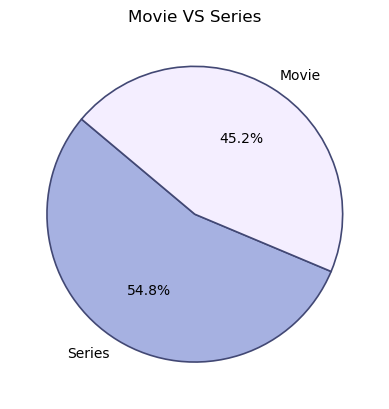

In [48]:
# VIZ
movie_type_counts = data['TYPE'].value_counts()

# Create a pie chart
plt.pie(
    movie_type_counts, 
    labels=movie_type_counts.index, 
    autopct='%1.1f%%', 
    colors=['#A6B1E1','#F4EEFF'],
    wedgeprops={'edgecolor': '#424874', 'linewidth': 1.2},
    startangle=140
) 

plt.title('Movie VS Series')
plt.show()

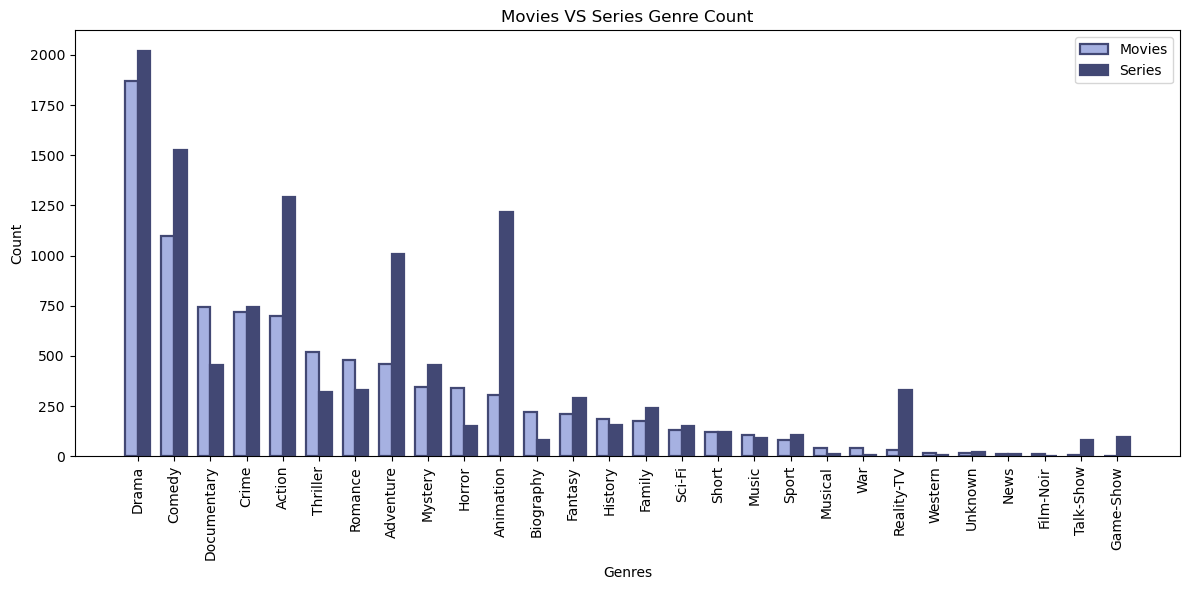

In [49]:
# Data parameters
genre_types = df_genres_count['GENRE']
dataset1 = df_genres_count['MOVIES_COUNT']
dataset2 = df_genres_count['SERIES_COUNT']
bar_width = 0.35
x_pos = range(len(genre_types))

# Create a figure and axis
fig, ax = plt.subplots(figsize=(12, 6))

# Create bar plots for movies and series
ax.bar(x_pos, dataset1, width=bar_width, label='Movies', align='center', color='#A6B1E1', edgecolor='#424874', linewidth=1.6)
ax.bar([x + bar_width for x in x_pos], dataset2, width=bar_width, label='Series', align='center', color='#424874', edgecolor='#424874', linewidth=1.6)

# Customize the x-axis labels
ax.set_xticks([x + bar_width / 2 for x in x_pos])
ax.set_xticklabels(genre_types, rotation=90)

# Add labels and title
ax.set_xlabel('Genres')
ax.set_ylabel('Count')
ax.set_title('Movies VS Series Genre Count')
ax.legend()

# Display the plot
plt.tight_layout()
plt.show()

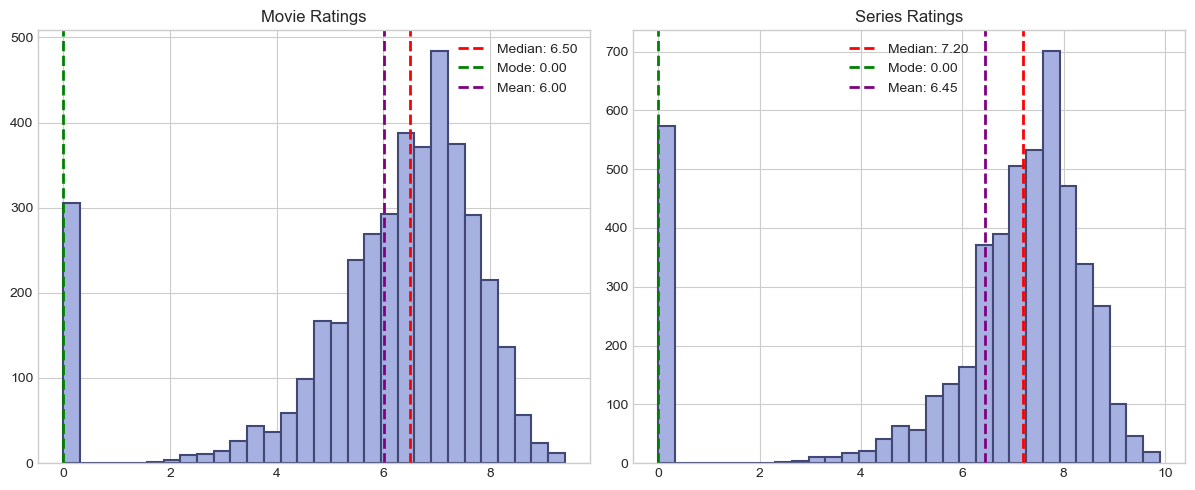

In [50]:
# Ratings distribution using histogram

# Filter data for movies and series separately
movie_data = data[data['TYPE'] == 'Movie']
series_data = data[data['TYPE'] == 'Series']

# Set plot size and style
plt.figure(figsize=(18, 5))
plt.style.use('seaborn-whitegrid')

# Plotting Movie Ratings Histogram
plt.subplot(131)
plt.hist(movie_data['RATING'], bins=30, color='#A6B1E1', edgecolor='#424874', linewidth=1.5)
plt.title('Movie Ratings')

# Calculate and display median, mode, and mean for movie ratings
median_movie = np.median(movie_data['RATING'])
mode_movie = movie_data['RATING'].mode().iloc[0]
mean_movie = np.mean(movie_data['RATING'])
plt.axvline(median_movie, color='red', linestyle='dashed', linewidth=2, label=f'Median: {median_movie:.2f}')
plt.axvline(mode_movie, color='green', linestyle='dashed', linewidth=2, label=f'Mode: {mode_movie:.2f}')
plt.axvline(mean_movie, color='purple', linestyle='dashed', linewidth=2, label=f'Mean: {mean_movie:.2f}')
plt.legend()

# Plotting Series Ratings Histogram
plt.subplot(132)
plt.hist(series_data['RATING'], bins=30, color='#A6B1E1', edgecolor='#424874', linewidth=1.5)
plt.title('Series Ratings')

# Calculate and display median, mode, and mean for series ratings
median_series = np.median(series_data['RATING'])
mode_series = series_data['RATING'].mode().iloc[0]
mean_series = np.mean(series_data['RATING'])
plt.axvline(median_series, color='red', linestyle='dashed', linewidth=2, label=f'Median: {median_series:.2f}')
plt.axvline(mode_series, color='green', linestyle='dashed', linewidth=2, label=f'Mode: {mode_series:.2f}')
plt.axvline(mean_series, color='purple', linestyle='dashed', linewidth=2, label=f'Mean: {mean_series:.2f}')

# Display legends
plt.legend()

# Adjust layout for better spacing
plt.tight_layout()

# Display the plot
plt.show()


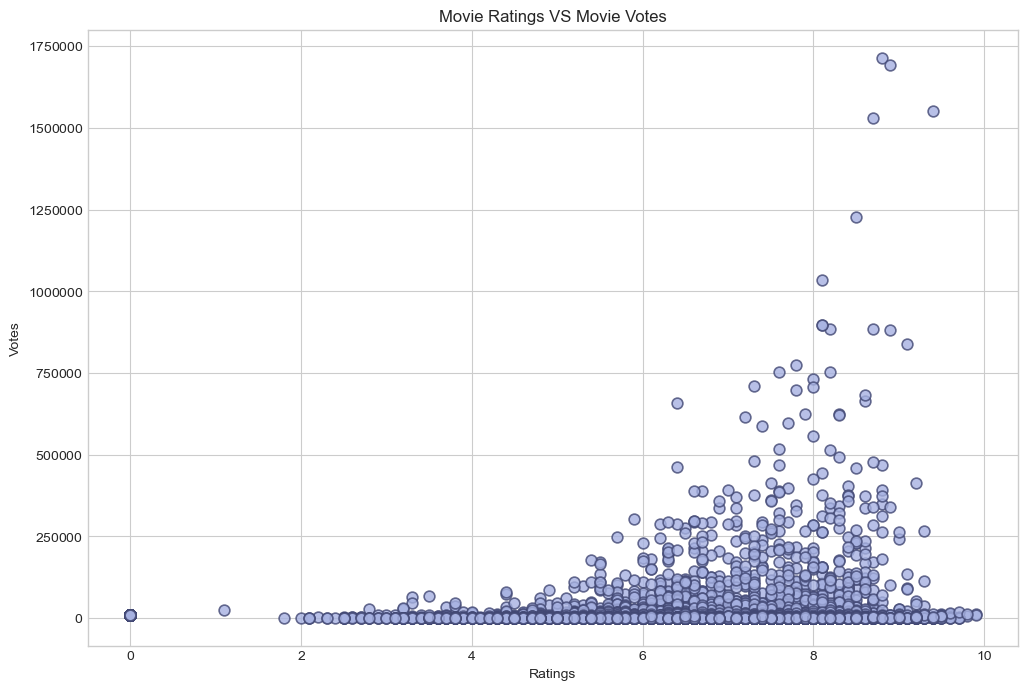

In [52]:
# Movie rating vs number of votes

# Create a scatter plot
plt.figure(figsize=(12, 8))
plt.scatter(data['RATING'], data['VOTES'], s=60, c='#A6B1E1', edgecolor='#424874', linewidth=1.2, alpha=0.8)

# Add labels and a title
plt.xlabel('Ratings')
plt.ylabel('Votes')
plt.title('Movie Ratings VS Movie Votes')

# Format y-axis ticks to values
plt.ticklabel_format(style='plain', axis='y', useOffset=False, useMathText=True)

# Display the plot
plt.show()

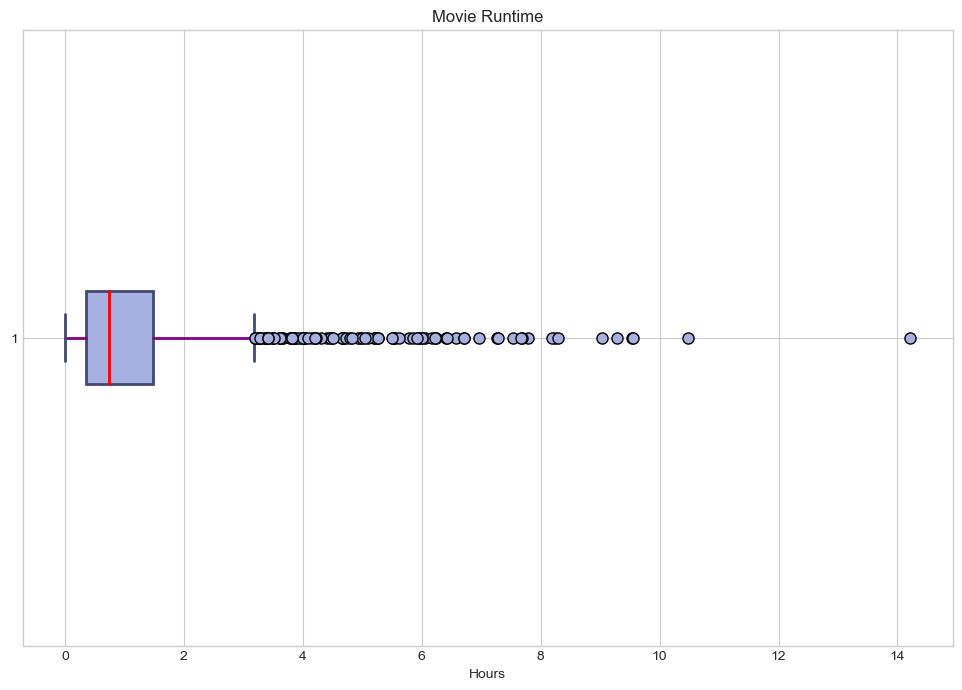

In [53]:
# Movie runtime boxplot

# Create a box plot
plt.figure(figsize=(12, 8))
movie_hrs = data['RUNTIME'] / 60

boxprops = dict(linewidth=2, color='#424874', facecolor='#A6B1E1')
medianprops = dict(linewidth=2, color='red')
whiskerprops = dict(linewidth=2, color='purple')
capprops = dict(linewidth=2, color='#424874')
flierprops = dict(marker='o', markerfacecolor='#A6B1E1', markersize=8, linestyle='none')

plt.boxplot(movie_hrs, vert=False, patch_artist=True,
            boxprops=boxprops, medianprops=medianprops,
            whiskerprops=whiskerprops,capprops=capprops, flierprops=flierprops)

# Add labels and title
plt.xlabel('Hours')
plt.title('Movie Runtime')

# Show the plot
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

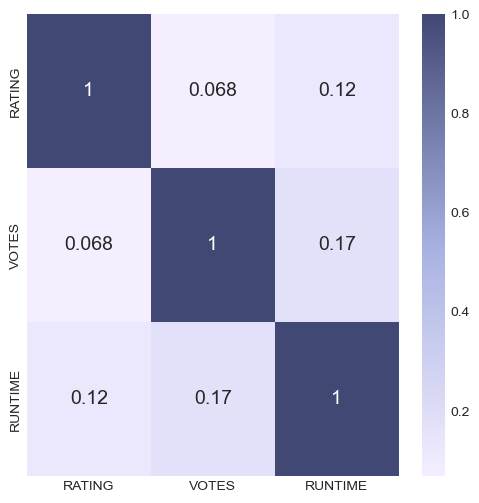

In [54]:
# Heatmap for corr between rating, votes and runtime
plt.figure(figsize=(6,6))
custom_cmap = mcolors.LinearSegmentedColormap.from_list("custom", ['#F4EEFF', '#A6B1E1', '#424874'])
sns.heatmap(df_insights.corr(), annot=True, cbar=True, annot_kws={'size': 14}, cmap=custom_cmap)
plt.show

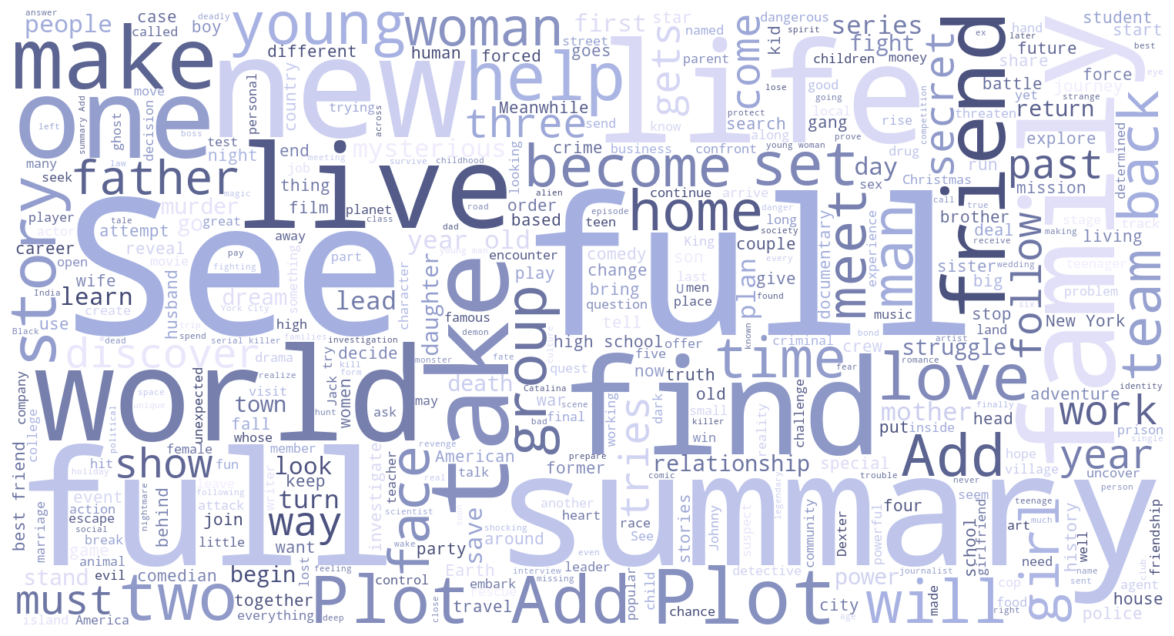

In [55]:
# Word map of one-line
corpus = ' '.join(data['ONE-LINE'])

colors = [(0, '#424874'), (0.7, '#A6B1E1'), (1, '#F4EEFF')] 
custom_colormap = LinearSegmentedColormap.from_list("custom_colormap", colors)

# Create a WordCloud
wordcloud = WordCloud(
    width=1500, 
    height=800, 
    background_color='white',
    colormap=custom_colormap,
    max_words=400,
)

# Generate the word cloud from the text
wordcloud.generate(corpus)

# Display the word cloud using Matplotlib
plt.figure(figsize=(18, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off") 
plt.show()
